## **Fraud Detection in Mobile Financial Transactions**
This project aims to enhance the accuracy of detecting fraud in mobile financial transactions by leveraging machine learning techniques.

## Dataset Description

- **step**: Unit of time in hours.
- **type**: Transaction type (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
- **amount**: Amount of transaction in local currency.
- **nameOrig**: Customer who initiated the transaction.
- **oldbalanceOrg**: Initial balance before the transaction.
- **newbalanceOrig**: New balance after the transaction.
- **nameDest**: Recipient of the transaction.
- **oldbalanceDest**: Initial balance of recipient before the transaction.
- **newbalanceDest**: New balance of recipient after the transaction.
- **isFraud**: Indicates if the transaction is fraudulent.


In [22]:
## Step 1: Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load dataset
data = pd.read_csv('Fraud_Analysis_Dataset.csv')

## Data Exploration

In [24]:
df =data.copy()

In [25]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [26]:
df.shape

(11142, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [28]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [29]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [30]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [31]:
df["step"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [32]:
df["type"].unique()

array(['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [33]:
df['type'].value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

In [34]:
df["isFraud"].unique()

array([1, 0])

In [35]:
df.type.value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

In [36]:
df['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

In [37]:
## Data Visualization
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 2
Float variables: 5


## Data Exploration Analysis

In [38]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


## Distribution of Fraudulent or Non Fraudulent

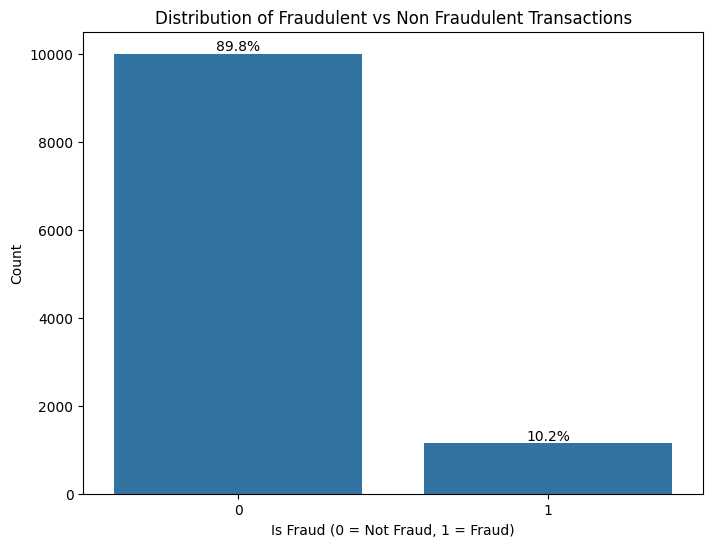

In [39]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs Non Fraudulent Transactions')

# Calculate the total number of transactions
total = len(df)

# Annotate the bars with percentage values
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.xlabel('Is Fraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

In [40]:
# Calculate the percentage of 0s and 1s in 'isFraud' column
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_percentage)


isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64


**Distribution of Fraudulent or Non Fraudulent chart** shows that **89.8%** of transactions are **non-fraudulent**, while **10.2%** are **fraudulent**, indicating a significant **class imbalance**.

## Analyzing Type and amount column simultaneously

Text(0.5, 1.0, 'Analyzing Type and amount column simultaneously')

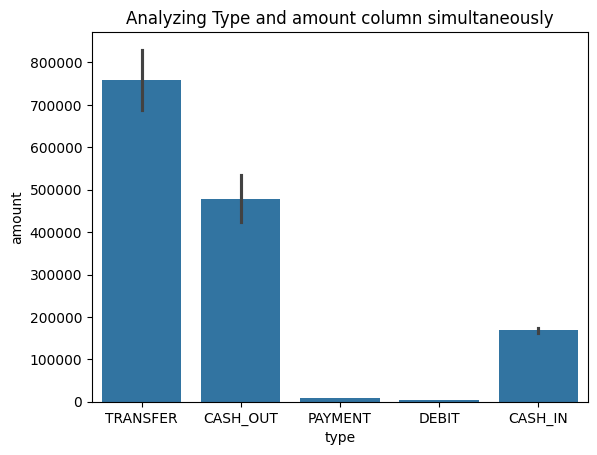

In [41]:
sns.barplot(x='type', y='amount', data=df)
plt.title('Analyzing Type and amount column simultaneously')

- **Type and Amount Graph** focuses on the **amount distribution** for different transaction types, showing that "Transfer" and "Cash Out" involve higher values, while "Payment" and "Debit" are for smaller amounts. This is useful for identifying suspicious transactions.

## Transaction Type Distribution (Percentage)

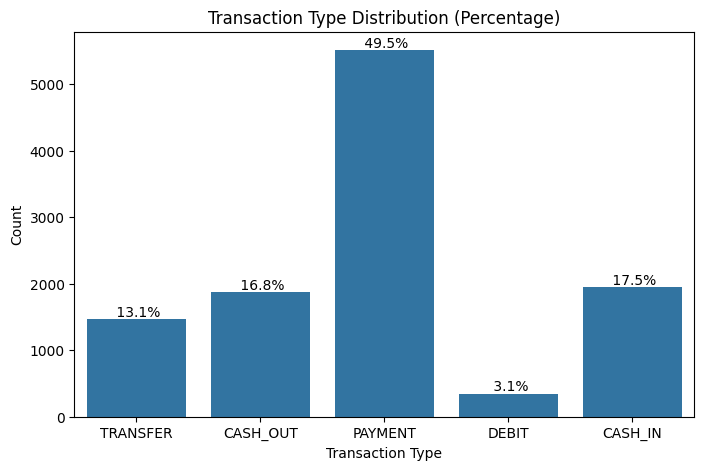

In [42]:
## Creating Countplot
plt.figure(figsize=(8,5))
ax = sns.countplot(x= "type", data = df)

# Calculate total number of transaction
total = len(df)

# Annotate the bars with percentage values
for p in ax.patches:
    height = p.get_height()
    percentage = (height/total)*100
    ax.annotate(f"{percentage: .1f}%",
                (p.get_x() + p.get_width()/2., height),
                ha = "center", va="bottom")
plt.title('Transaction Type Distribution (Percentage)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

The **Transaction Type Distribution Graph**, on the other hand, shows the **percentage of each transaction type**, highlighting that "Payment" transactions are the most frequent (~50%), while "Transfer" and "Cash Out" are less common.

**Difference:** The first graph is about **value analysis**, while the second graph is about **frequency analysis**. Together, they provide a complete picture of transaction behaviors.

## Amount Distribution for Fraudulent Transactions

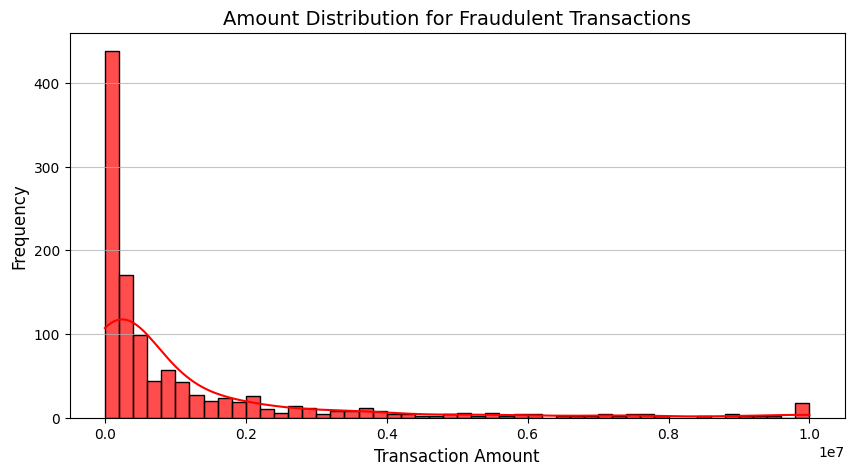

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering fraudulent transactions
fraudulent_data = df[df['isFraud'] == 1]

# Plotting the histogram for fraud amounts
plt.figure(figsize=(10, 5))
sns.histplot(fraudulent_data['amount'], bins=50, kde=True, color='red', alpha=0.7)
plt.title('Amount Distribution for Fraudulent Transactions', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

- 1. **Fraudulent Transactions:**
   - Most of these transactions are for small amounts of money.
   - Very few fraudulent transactions are for high amounts, as fraudsters usually avoid high-value transactions to stay unnoticed.

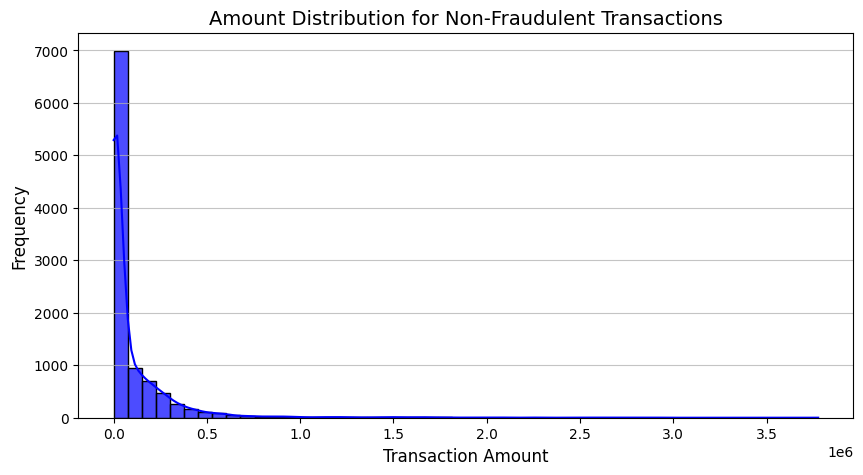

In [44]:
# Non-Fraudulent Transactions
# Filtering non-fraudulent transactions
non_fraudulent_data = df[df['isFraud'] == 0]

# Plotting the histogram for non-fraudulent amounts
plt.figure(figsize=(10, 5))
sns.histplot(non_fraudulent_data['amount'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Amount Distribution for Non-Fraudulent Transactions', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

- 2. **Non-Fraudulent Transactions:**
  - Genuine transactions also show a high frequency for lower transaction amounts.
   - However, the range of non-fraudulent transactions is more widespread, and high-value transactions are relatively more common compared to fraudulent transactions.

## Balance Changes Analysis

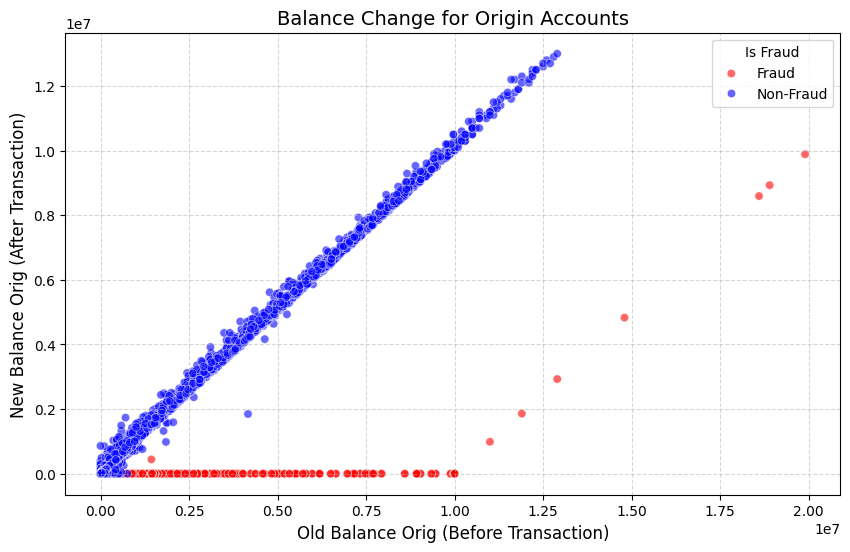

In [45]:
# Plotting balance changes for sender (origin account)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=df, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Balance Change for Origin Accounts', fontsize=14)
plt.xlabel('Old Balance Orig (Before Transaction)', fontsize=12)
plt.ylabel('New Balance Orig (After Transaction)', fontsize=12)
plt.legend(title='Is Fraud', labels=['Fraud','Non-Fraud'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

- Non-Fraudulent Transactions **(Blue Dots):**

- Follow a consistent and logical pattern.

- The sender's and receiver's balances are properly updated (e.g., Old Balance - Transaction Amount = New Balance).

- These points form a predictable straight line.

- Fraudulent Transactions **(Red Dots):**

- Initially follow expected patterns (e.g., sender's balance goes to zero after the transaction).

- Later deviate with inconsistent or unusual balance updates, breaking the straight-line pattern.

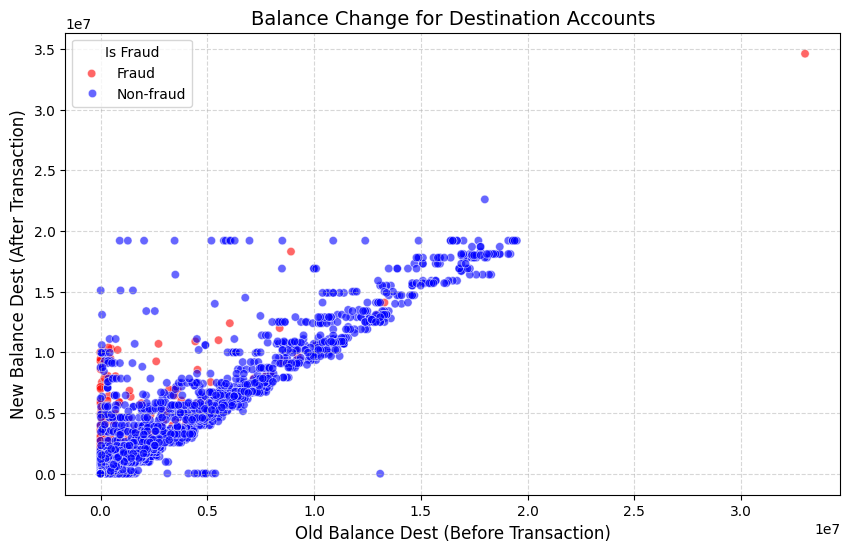

In [46]:
# Plotting balance changes for receiver (destination account)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=df, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Balance Change for Destination Accounts', fontsize=14)
plt.xlabel('Old Balance Dest (Before Transaction)', fontsize=12)
plt.ylabel('New Balance Dest (After Transaction)', fontsize=12)
plt.legend(title='Is Fraud', labels=['Fraud', 'Non-fraud'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

- **Key Insight (What This Graph Represents):**
**Non-Fraudulent Transactions:**

Consistently logical and predictable pattern showing. Old balance and transaction amount showing perfect relation 

- **Fraudulent Transactions:**

Inconsistent and unusual patterns showing in this graph. sometimes huge balance balance changes or outliers can be seen.

**This is helpfull for fraud detection signals**

## Feature Engineering

In [47]:
df.type.value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

## Use Mapping for encode categorical features

In [48]:
df["type"] =df["type"].map({"CASH_OUT":1, "PAYMENT":2, "CASH_IN":3, "TRANSFER":4,"DEBIT":5})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,4,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,4,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,1,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,4,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [49]:
# Dropping irrelevant columns
df = df.drop(columns=['nameOrig', 'nameDest','step'])

In [50]:
df.shape

(11142, 7)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            11142 non-null  int64  
 1   amount          11142 non-null  float64
 2   oldbalanceOrg   11142 non-null  float64
 3   newbalanceOrig  11142 non-null  float64
 4   oldbalanceDest  11142 non-null  float64
 5   newbalanceDest  11142 non-null  float64
 6   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 609.5 KB


## Checking Correlation

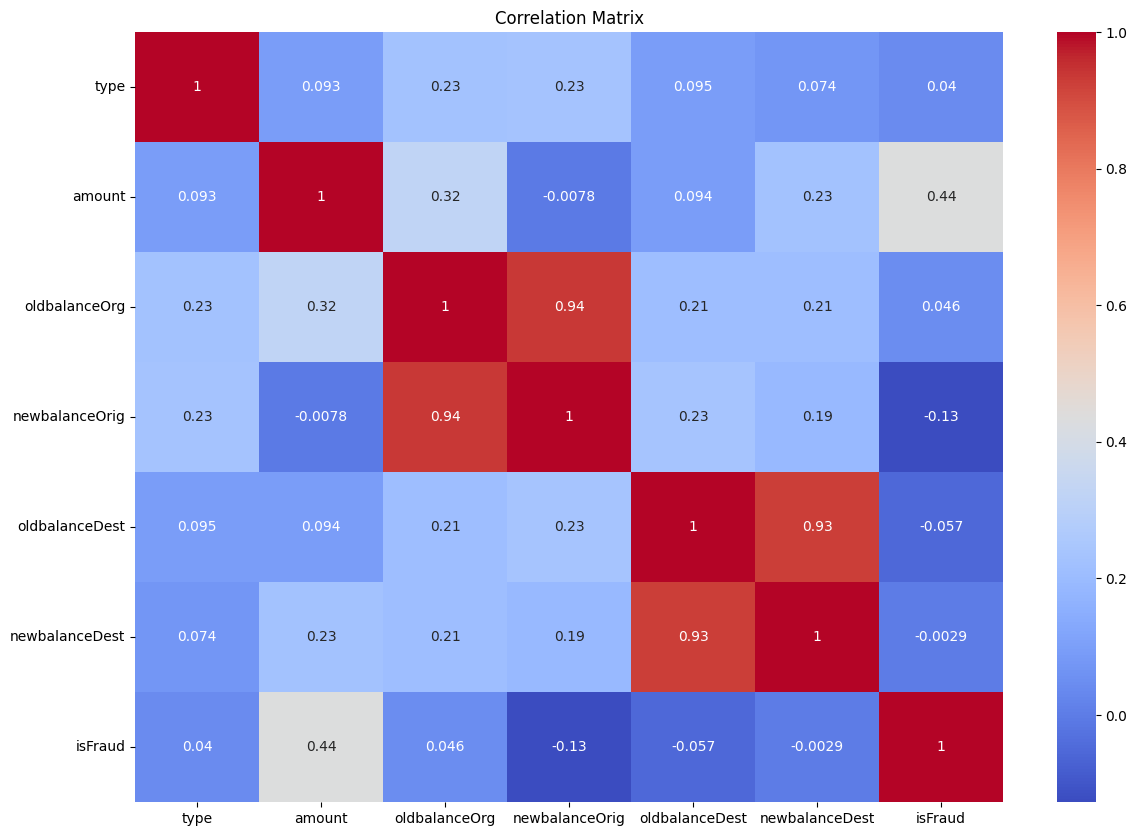

In [52]:
# Selecting only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number'])

# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Train-Test Split

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
# Selecting important features based on correlation
# Train-Test Split
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [55]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,4,181.0,181.0,0.0,0.0,0.0
1,1,181.0,181.0,0.0,21182.0,0.0
2,4,2806.0,2806.0,0.0,0.0,0.0
3,1,2806.0,2806.0,0.0,26202.0,0.0
4,4,20128.0,20128.0,0.0,0.0,0.0


In [56]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: isFraud, dtype: int64

In [57]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## **Logistic Regression**

## Check Accuracy on Test Data

In [58]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [59]:
# Predict test data
y_pred_test = lr.predict(x_test)
# Predict train data
y_pred_train = lr.predict(x_train)

In [60]:
y_pred_test

array([0, 1, 0, ..., 0, 0, 0])

In [61]:
y_pred_train

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
# Shapes of test data and predictions
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred_test shape:", y_pred_test.shape)

x_test shape: (2229, 6)
y_test shape: (2229,)
y_pred_test shape: (2229,)


In [63]:
# Shapes of train data and predictions
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("y_pred_train shape:", y_pred_train.shape)

X_train shape: (8913, 6)
y_train shape: (8913,)
y_pred_train shape: (8913,)


In [64]:
import pandas as pd

# Define the manual input 
manual_input = pd.DataFrame([[2, 10000, 50000, 40000, 10000, 20000]], 
                            columns=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

# Make prediction using the trained Logistic Regression model
prediction = lr.predict(manual_input)  # Replace log_reg with your trained model

# Output the prediction
if prediction[0] == 1:
    print("The transaction is FRAUD.")
else:
    print("The transaction is non-fraud.")


The transaction is non-fraud.


## Performance Evaluation on test data

In [65]:
# Test data accuracy
accuracy = lr.score(x_test, y_test)
accuracy_percent = accuracy * 100
print("Accuracy on test data is : {:.2f}%".format(accuracy_percent))

Accuracy on test data is : 96.68%


In [66]:
# Train data accuracy
accuracy = lr.score(x_train, y_train)
accuracy_percent = accuracy * 100
print("Accuracy on train data is : {:.2f}%".format(accuracy_percent))

Accuracy on train data is : 96.84%


In [67]:
from sklearn.metrics import classification_report

In [68]:
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1999
           1       0.93      0.73      0.82       230

    accuracy                           0.97      2229
   macro avg       0.95      0.86      0.90      2229
weighted avg       0.97      0.97      0.96      2229



## Confusion Matrix Visualization for test data

In [69]:
from sklearn.metrics import confusion_matrix

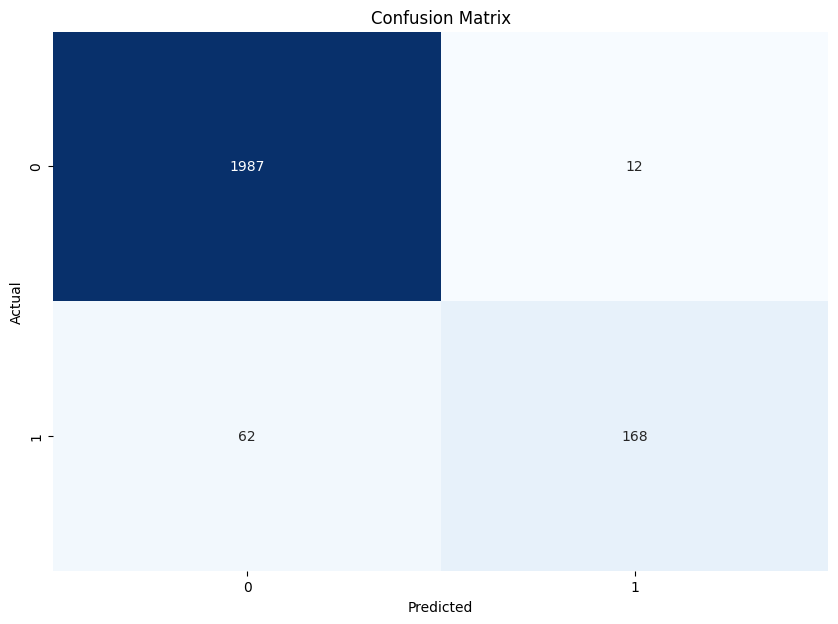

In [70]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **True Positive(168)**: These are the fraud transactions that model correctly identify as Fraud.
- **False Positive(12)**: These are the non-fraud transactions that model incorrectly identify as fraud.
- **False Negative(62)**: These are the fraud transactions that model incorrectly identify as non-fraud
- **True Negative(1987)**: These are the non-fraud transactions that the model correctly identified as non-fraud.

precision is an important metric here. calculate precision. so, i can easily identify how accurate my model is when it predicts a transaction as fraud

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [72]:
# Precision
precision = precision_score(y_test, y_pred_test)
precision_percent = precision * 100
print("Precision on test data is : {:.2f}%".format(precision_percent))

Precision on test data is : 93.33%


In [73]:
# Recall
recall = recall_score(y_test, y_pred_test)
recall_percent = recall *100
print("recall on test data is : {:.2f}%".format(recall_percent))

recall on test data is : 73.04%


In [74]:
# F1-Score Calculation
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score_percent = f1_score * 100
print("F1-Score on test data is : {:.2f}%".format(f1_score_percent))

F1-Score on test data is : 81.95%


In [75]:
# Assuming 'model' is your trained classifier
y_prob = lr.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (fraudulent)


In [76]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc_percent = roc_auc * 100
print("ROC AUC Score on test data is : {:.2f}%".format(roc_auc_percent))

ROC AUC Score on test data is : 97.65%


## ROC Curve for Test Data

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve,auc
import matplotlib.pyplot as plt

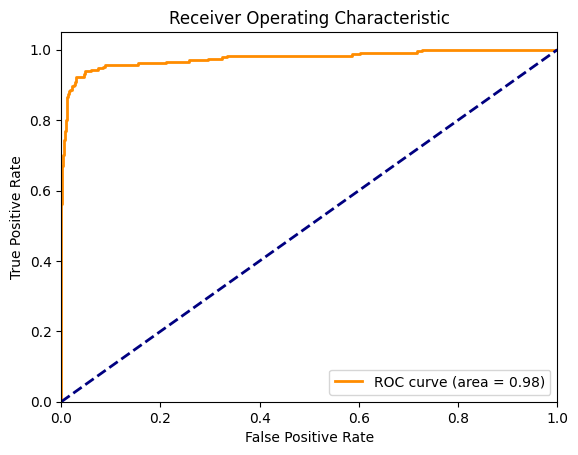

In [78]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_val = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Model Performance 

- **Training Accuracy**: 96.84%
- **Test Accuracy**: 96.68%
- **Precision**: 93.33%
- **Recall**: 73.04%
- **F1-Score**: 81.95%
- **ROC AUC Score**: 97.65%

## Business Questions Answered based on Logistic Model Performance

- **1.** What is the model's precision and accuracy in detecting fraudulent transactions?

**Precision:** 93.33% This means that 93.33% of transactions predicted as fraudulent are indeed fraudulent.

**Accuracy:** 96.68% The overall accuracy indicates that the model correctly classifies 96.68% of transactions as either legitimate or fraudulent.

- **2** How reliable is the model in classifying transactions as legitimate or fraudulent?

**Recall (Sensitivity):** 73.04% This indicates that the model successfully identifies 73.04% of all actual fraudulent transactions.

**F1-Score:** 81.95% The F1-score highlights a good balance between precision and recall, showing that the model has a strong overall performance in fraud detection.

**ROC AUC Score:** 97.65% The high ROC AUC score reflects excellent capability in distinguishing between legitimate and fraudulent transactions.

- **3** What are the potential losses due to model errors?

**False Negatives Impact:** With a recall of 73.04%, around 26.96% of fraudulent transactions might be missed, potentially leading to financial losses if fraudulent activities go undetected.

**False Positives Impact:** With a precision of 93.33%, about 6.67% of legitimate transactions could be incorrectly flagged as fraudulent, causing inconvenience to users and operational overhead.

## Class Imbalance Logistic Regression Handling (Using SMOTE)

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
# Apply SMOTE for Resample
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_bal, y_train_bal)

In [82]:
# Train the model
model_bal = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=42)
model_bal.fit(x_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [83]:
# Predict and evaluate
y_pred_bal = model_bal.predict(x_test_bal)

## Calculate confusion matrix

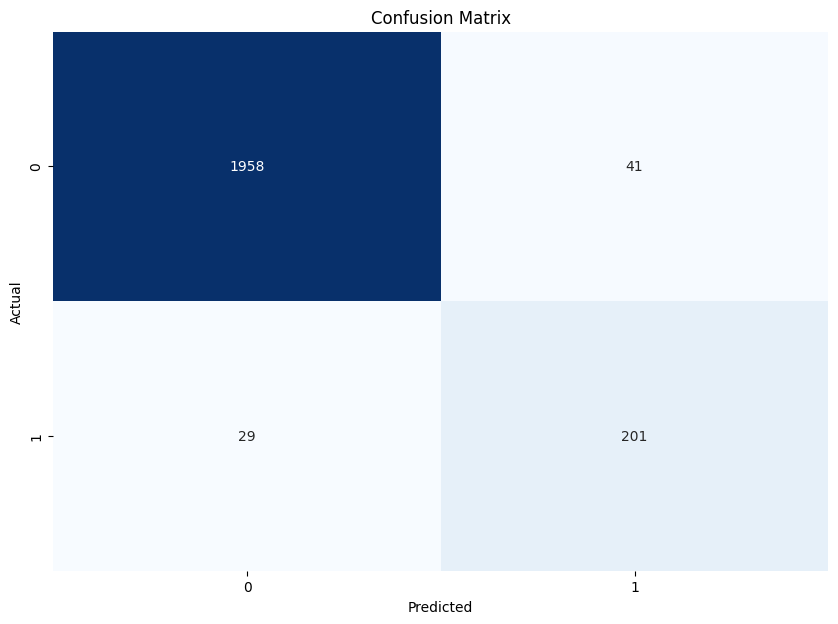

In [84]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_bal, y_pred_bal)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [85]:
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1999
           1       0.83      0.87      0.85       230

    accuracy                           0.97      2229
   macro avg       0.91      0.93      0.92      2229
weighted avg       0.97      0.97      0.97      2229



- **True Positives (201)**: These are the fraud transactions that the model correctly identified as fraud.

- **False Positives (41)**: These are the non-fraud transactions that the model incorrectly identified as fraud.

- **False Negatives (29)**: These are the fraud transactions that the model incorrectly identified as non-fraud.

- **True Negatives (1958)**: These are the non-fraud transactions that the model correctly identified as non-fraud.

In [86]:
# Precision
precision = precision_score(y_test_bal, y_pred_bal)
precision_percent = precision * 100
print("Precision on test data is : {:.2f}%".format(precision_percent))

Precision on test data is : 83.06%


In [87]:
# Recall
recall = recall_score(y_test_bal, y_pred_bal)
recall_percent = recall * 100
print("Recall on test data is : {:.2f}%".format(recall_percent))

Recall on test data is : 87.39%


In [88]:
# F1-Score Calculation
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score_percent = f1_score * 100
print("F1-Score on test data is : {:.2f}%".format(f1_score_percent))

F1-Score on test data is : 85.17%


In [89]:
from sklearn.metrics import accuracy_score
# Training Accuracy
training_accuracy = accuracy_score(y_train_res, model_bal.predict(x_train_res))
training_accuracy_percent = training_accuracy * 100
print("Training Accuracy: {:.2f}%".format(training_accuracy_percent))

# Test Accuracy
test_accuracy = accuracy_score(y_test_bal, y_pred_bal)
test_accuracy_percent = test_accuracy * 100
print("Test Accuracy: {:.2f}%".format(test_accuracy_percent))

Training Accuracy: 93.03%
Test Accuracy: 96.86%


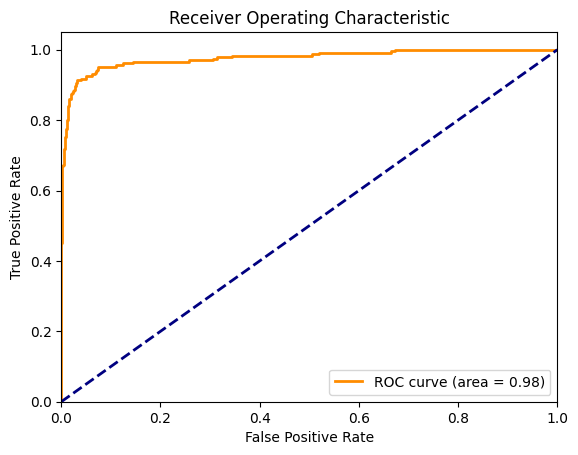

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score

# Assuming model_bal is your trained model and X_test_bal, y_test_bal are your test data
# Predict probabilities
y_prob = model_bal.predict_proba(x_test_bal)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_bal, y_prob)
roc_auc_val = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [91]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test_bal, y_prob)
roc_auc_percent = roc_auc * 100
print("ROC AUC Score on test data is : {:.2f}%".format(roc_auc_percent))

ROC AUC Score on test data is : 97.70%


## K-Fold Cross-Validation

In [92]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Preparing the data (assuming X and y are your features and labels)
# X, y = ...

In [93]:
# Creating K-Fold cross-validator
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
# Creating logistic regression model with increased iterations
model = LogisticRegression(solver='liblinear', max_iter=500)
# Creating a pipeline with scaling and the model
pipeline = make_pipeline(StandardScaler(), model)
# Performing K-Fold cross-validation
results = cross_val_score(pipeline, x, y, cv=kfold)

# Printing the average cross-validation accuracy
print("K-Fold Cross-Validation Accuracy: %.2f%%" % (results.mean() * 100))


K-Fold Cross-Validation Accuracy: 94.46%


In [94]:
import pandas as pd

# Define the manual input 
manual_input = pd.DataFrame([[2, 10000, 50000, 40000, 10000, 20000]], 
                            columns=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

# Make prediction using the trained Logistic Regression model
prediction = model_bal.predict(manual_input)  # Replace log_reg with your trained model

# Output the prediction
if prediction[0] == 1:
    print("The transaction is FRAUD.")
else:
    print("The transaction is non-fraud.")


The transaction is non-fraud.


## Logistic Model Performance after Smoting 

- **Training Accuracy**: 93.03%
- **Test Accuracy**: 96.86%
- **Precision**: 83.06%
- **Recall**: 87.39%
- **F1-Score**: 85.17%
- **ROC AUC Score**: 97.70%
- **K-Fold Cross-Validation Accuracy**: 94.46%

## Business Questions Answered Logistic Model Performance after Smoting

- **1.** What is the model's precision and accuracy in detecting fraudulent transactions?

**Precision:** 83.06% This indicates that 83.06% of transactions predicted as fraudulent are actually fraudulent.

**Accuracy:** 96.86% The overall accuracy shows that the model correctly classifies 96.86% of all transactions.

- **2** How reliable is the model in classifying transactions as legitimate or fraudulent?

**Recall (Sensitivity):** 87.39% The model successfully identifies 87.39% of all actual fraudulent transactions, showing an improvement in capturing fraud.

**F1-Score:** 85.17% The F1-score reflects a better balance between precision and recall, demonstrating strong overall fraud detection performance.

**ROC AUC Score:** 97.70% The high ROC AUC score indicates excellent ability to distinguish between legitimate and fraudulent transactions.

**K-Fold Cross-Validation Accuracy:** 94.46% Consistent cross-validation accuracy underscores the model's reliability and robustness across multiple data splits.

- **3** What are the potential losses due to model errors?

**False Negatives Impact:** With a recall of 87.39%, about 12.61% of fraudulent transactions might still be missed, potentially leading to financial losses.

**False Positives Impact:** With a precision of 83.06%, around 16.94% of legitimate transactions may be incorrectly flagged as fraudulent, causing some customer inconvenience and operational overhead.

## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [97]:
x_train.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
10619,2,4536.73,30240.00,25703.27,0.00,0.00
10887,3,11609.72,7680133.90,7691743.61,40401.00,28791.28
6749,2,7959.49,0.00,0.00,0.00,0.00
9233,4,819668.37,0.00,0.00,6518936.04,10000000.00
7131,2,3799.78,47156.02,43356.24,0.00,0.00


In [98]:
## Train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [99]:
# Predict on the test set
y_pred_rf = model_rf.predict(x_test)

## Confusion matrix

In [100]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

Confusion Matrix:
 [[1995    4]
 [   9  221]]


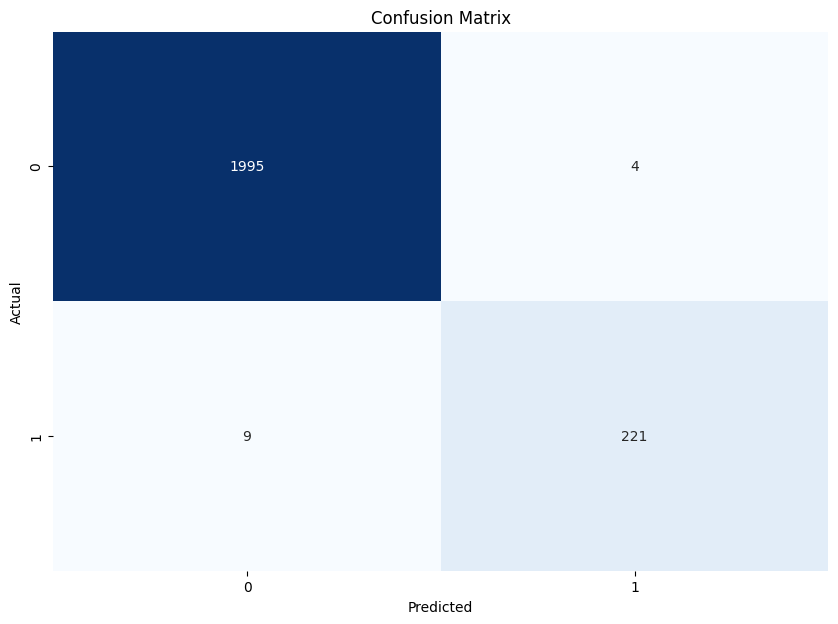

In [101]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Classification Report

In [102]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.98      0.96      0.97       230

    accuracy                           0.99      2229
   macro avg       0.99      0.98      0.98      2229
weighted avg       0.99      0.99      0.99      2229



## Evaluation matrix

In [103]:
# Precision
precision_rf = precision_score(y_test, y_pred_rf)
precision_rf_percent = precision_rf * 100
print("Precision on test data is : {:.2f}%".format(precision_rf_percent))

Precision on test data is : 98.22%


In [104]:
# Recall
recall_rf = recall_score(y_test, y_pred_rf)
recall_rf_percent = recall_rf * 100
print("Recall on test data is : {:.2f}%".format(recall_rf_percent))

Recall on test data is : 96.09%


In [105]:
# F1-Score Calculation
f1_rf = f1_score(y_test, y_pred_rf)
f1_rf_percent = f1_rf * 100
print("F1-Score on test data is : {:.2f}%".format(f1_rf_percent))

F1-Score on test data is : 97.14%


## Calculate and Print Training and Test Accuracy

In [106]:
from sklearn.metrics import accuracy_score

# Training Accuracy
train_accuracy_rf = accuracy_score(y_train, model_rf.predict(x_train))
train_accuracy_rf_percent = train_accuracy_rf * 100
print("Training Accuracy on test data is : {:.2f}%".format(train_accuracy_rf_percent))

# Test Accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_accuracy_rf_percent = test_accuracy_rf * 100
print("Test Accuracy on test data is : {:.2f}%".format(test_accuracy_rf_percent))

Training Accuracy on test data is : 99.91%
Test Accuracy on test data is : 99.42%


## Plot ROC Curve:

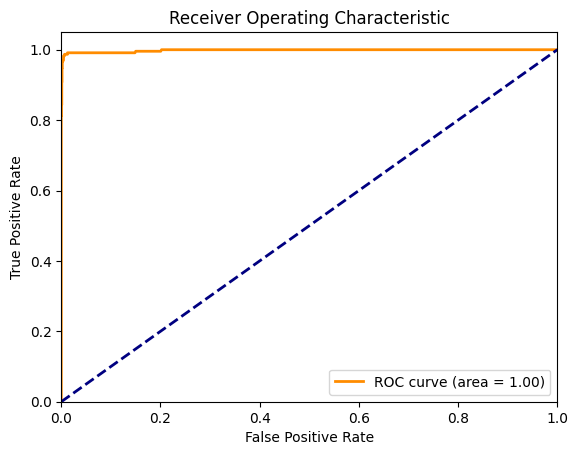

In [107]:
y_prob_rf = model_rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_val_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [108]:
# ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_rf_percent = roc_auc_rf * 100
print("ROC AUC Score on test data is : {:.2f}%".format(roc_auc_rf_percent))

ROC AUC Score on test data is : 99.81%


In [109]:
import pandas as pd

# Define the manual input 
manual_input = pd.DataFrame([[4, 10000, 50000, 40000, 10000, 0.0]], 
                            columns=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

# Make prediction using the trained Logistic Regression model
prediction = model_rf.predict(manual_input)  # Replace log_reg with your trained model

# Output the prediction
if prediction[0] == 1:
    print("The transaction is FRAUD.")
else:
    print("The transaction is non-fraud.")


The transaction is non-fraud.


## K-Fold Cross-Validation

In [110]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
# Creating K-Fold cross-validator
kfold_rf = KFold(n_splits=5, random_state=42, shuffle=True)

# Creating a pipeline with the model
pipeline_rf = make_pipeline(model_rf)

# Performing K-Fold cross-validation
results_rf = cross_val_score(pipeline_rf, x, y, cv=kfold_rf)

# Printing the average cross-validation accuracy
print("K-Fold Cross-Validation Accuracy: %.2f%%" % (results_rf.mean() * 100))

K-Fold Cross-Validation Accuracy: 99.51%


## Random Forest Performance

- **Training Accuracy**: 99.91%
- **Test Accuracy**: 99.42%
- **Precision**: 98.22%
- **Recall**: 96.09%
- **F1-Score**: 97.14%
- **ROC AUC Score**: 99.81%
- **K-Fold Cross-Validation Accuracy**: 99.51%

- **1.** What is the model's precision and accuracy in detecting fraudulent transactions?  
  **Precision:** 98.22% This indicates that 98.22% of transactions predicted as fraudulent are actually fraudulent.  

  **Accuracy:** 99.42% The overall accuracy shows that the model correctly classifies 99.42% of all transactions.  

- **2.** How reliable is the model in classifying transactions as legitimate or fraudulent?  
  **Recall (Sensitivity):** 96.09% The model successfully identifies 96.09% of all actual fraudulent transactions, demonstrating high reliability in detecting fraud.  

  **F1-Score:** 97.14% The F1-score reflects an excellent balance between precision and recall, showcasing strong overall fraud detection performance.  

  **ROC AUC Score:** 99.81% The high ROC AUC score indicates exceptional ability to distinguish between legitimate and fraudulent transactions.  

  **K-Fold Cross-Validation Accuracy:** 99.51% Consistent cross-validation accuracy underscores the model's robustness and reliability across multiple data splits.  

- **3.** What are the potential losses due to model errors?  
  **False Negatives Impact:** With a recall of 96.09%, only about 3.91% of fraudulent transactions might still be missed, significantly reducing financial losses compared to less effective models.  

  **False Positives Impact:** With a precision of 98.22%, around 1.78% of legitimate transactions may be incorrectly flagged as fraudulent, minimizing inconvenience to users and operational overhead.

## **Implementing Gradient Boosting**

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [113]:
## Train the Gradient Boosting Model
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [114]:
y_pred_gb = model_gb.predict(x_test)

## Calculate Confusion Matrix

In [115]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n", cm_gb)

Confusion Matrix:
 [[1990    9]
 [  10  220]]


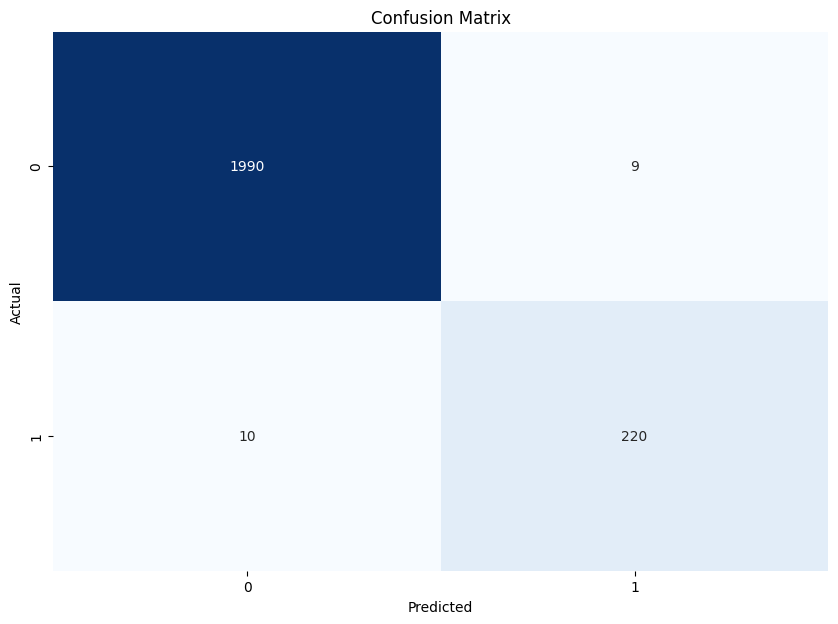

In [116]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [117]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       0.96      0.96      0.96       230

    accuracy                           0.99      2229
   macro avg       0.98      0.98      0.98      2229
weighted avg       0.99      0.99      0.99      2229



## Evaluation Matrix

In [118]:
# Precision
precision_gb = precision_score(y_test, y_pred_gb)
precision_gb_percent = precision_gb * 100
print("Precision on test data is : {:.2f}%".format(precision_gb_percent))

Precision on test data is : 96.07%


In [119]:
# Recall
recall_gb = recall_score(y_test, y_pred_gb)
recall_gb_percent = recall_gb * 100
print("Recall on test data is : {:.2f}%".format(recall_gb_percent))

Recall on test data is : 95.65%


In [120]:
# F1-Score Calculation
f1_gb = f1_score(y_test, y_pred_gb)
f1_gb_percent = f1_gb * 100
print("F1-Score on test data is : {:.2f}%".format(f1_gb_percent))

F1-Score on test data is : 95.86%


## Calculate and Print Training and Test Accuracy

In [121]:
from sklearn.metrics import accuracy_score

# Training Accuracy
train_accuracy_gb = accuracy_score(y_train, model_gb.predict(x_train))
train_accuracy_gb_percent = train_accuracy_gb * 100
print("Training Accuracy on test data is : {:.2f}%".format(train_accuracy_gb_percent))

# Test Accuracy
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
test_accuracy_gb_percent = test_accuracy_gb * 100
print("Test Accuracy on test data is : {:.2f}%".format(test_accuracy_gb_percent))


Training Accuracy on test data is : 99.66%
Test Accuracy on test data is : 99.15%


## Plot ROC Curve

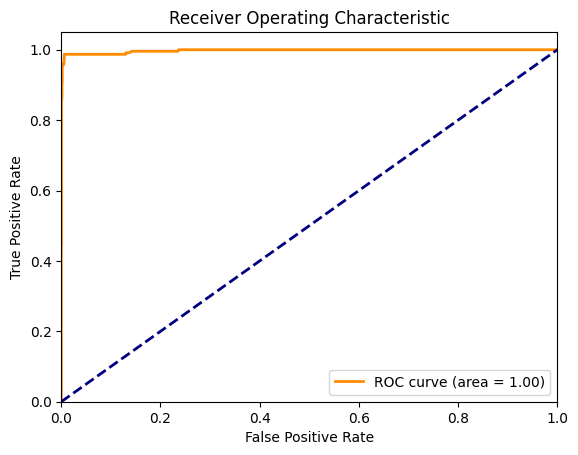

In [122]:
y_prob_gb = model_gb.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_val_gb = auc(fpr_gb, tpr_gb)
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [123]:
# ROC AUC Score
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
roc_auc_gb_percent = roc_auc_gb * 100
print("ROC AUC Score on test data is : {:.2f}%".format(roc_auc_gb_percent))


ROC AUC Score on test data is : 99.73%


## Gradient Boosting

- **Training Accuracy**: 99.66%
- **Test Accuracy**: 99.15%
- **Precision**: 96.07%
- **Recall**: 95.65%
- **F1-Score**: 95.86%
- **ROC AUC Score**: 99.73%

- **1.** What is the model's precision and accuracy in detecting fraudulent transactions?  
  **Precision:** 96.07% This indicates that 96.07% of transactions predicted as fraudulent are actually fraudulent.  

  **Accuracy:** 99.15% The overall accuracy shows that the model correctly classifies 99.15% of all transactions.  

- **2.** How reliable is the model in classifying transactions as legitimate or fraudulent?  
  **Recall (Sensitivity):** 95.65% The model successfully identifies 95.65% of all actual fraudulent transactions, demonstrating high reliability in detecting fraud.  

  **F1-Score:** 95.86% The F1-score reflects a strong balance between precision and recall, showcasing effective fraud detection performance.  

  **ROC AUC Score:** 99.73% The high ROC AUC score indicates excellent ability to distinguish between legitimate and fraudulent transactions.  

- **3.** What are the potential losses due to model errors?  
  **False Negatives Impact:** With a recall of 95.65%, only about 4.35% of fraudulent transactions might still be missed, reducing financial losses compared to less effective models.  

  **False Positives Impact:** With a precision of 96.07%, around 3.93% of legitimate transactions may be incorrectly flagged as fraudulent, causing minimal inconvenience to users and operational overhead.

## Implementing XGBoost

In [124]:
import xgboost as xgb

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [126]:
x_train.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
10619,2,4536.73,30240.00,25703.27,0.00,0.00
10887,3,11609.72,7680133.90,7691743.61,40401.00,28791.28
6749,2,7959.49,0.00,0.00,0.00,0.00
9233,4,819668.37,0.00,0.00,6518936.04,10000000.00
7131,2,3799.78,47156.02,43356.24,0.00,0.00


In [127]:
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [128]:
y_pred_xgb = model_xgb.predict(x_test)

In [129]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

Confusion Matrix:
 [[1992    7]
 [   8  222]]


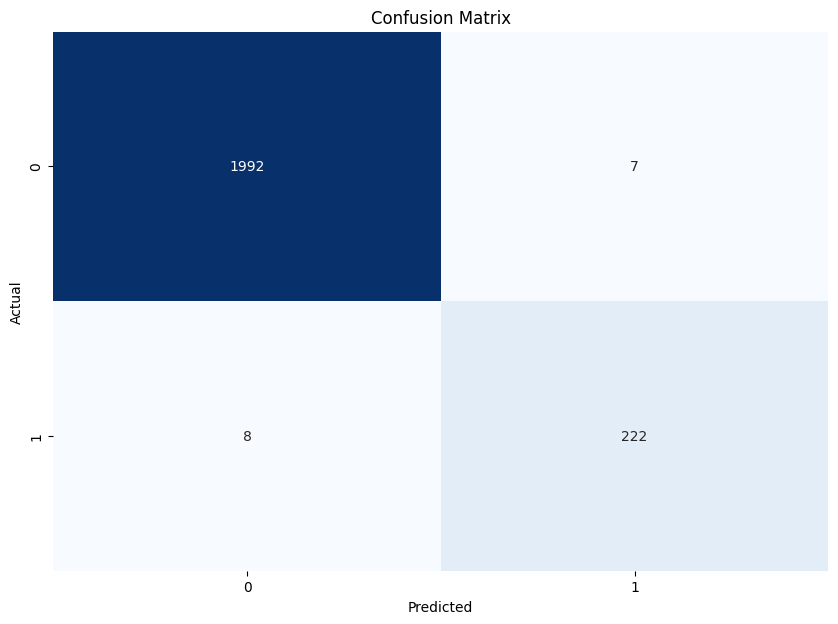

In [130]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [131]:
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.97      0.97      0.97       230

    accuracy                           0.99      2229
   macro avg       0.98      0.98      0.98      2229
weighted avg       0.99      0.99      0.99      2229



In [132]:
# Precision
precision_xgb = precision_score(y_test, y_pred_xgb)
precision_xgb_percent = precision_xgb * 100
print("Precision on test data is : {:.2f}%".format(precision_xgb_percent))

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb)
recall_xgb_percent = recall_xgb * 100
print("Recall on test data is : {:.2f}%".format(recall_xgb_percent))

# F1-Score
f1_xgb = f1_score(y_test, y_pred_xgb)
f1_xgb_percent = f1_xgb * 100
print("F1-Score on test data is : {:.2f}%".format(f1_xgb_percent))

Precision on test data is : 96.94%
Recall on test data is : 96.52%
F1-Score on test data is : 96.73%


In [133]:
from sklearn.metrics import accuracy_score

# Training Accuracy
train_accuracy_xgb = accuracy_score(y_train, model_xgb.predict(x_train))
train_accuracy_xgb_percent = train_accuracy_xgb * 100
print("Training Accuracy on test data is : {:.2f}%".format(train_accuracy_xgb_percent))

# Test Accuracy
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_accuracy_xgb_percent = test_accuracy_xgb * 100
print("Test Accuracy on test data is : {:.2f}%".format(test_accuracy_xgb_percent))


Training Accuracy on test data is : 99.61%
Test Accuracy on test data is : 99.33%


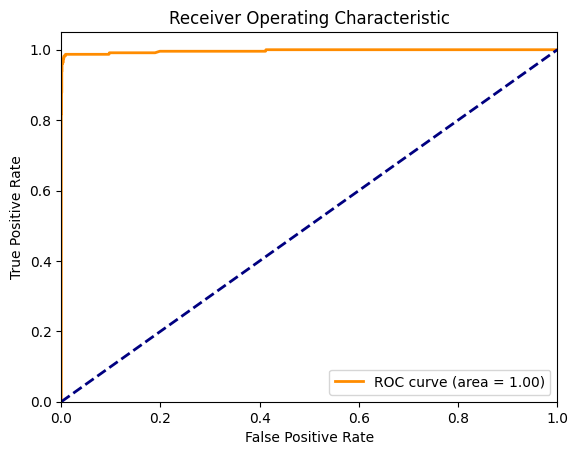

In [134]:
y_prob_xgb = model_xgb.predict_proba(x_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_val_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [135]:
# ROC AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
roc_auc_xgb_percent = roc_auc_xgb * 100
print("ROC AUC Score on test data is : {:.2f}%".format(roc_auc_xgb_percent))

ROC AUC Score on test data is : 99.67%


## XGBoost Performance
- **Training Accuracy**: 99.61%
- **Test Accuracy**: 99.33%
- **Precision**: 96.94%
- **Recall**: 96.52%
- **F1-Score**: 96.73%
- **ROC AUC Score**: 99.67%

- **1.** What is the model's precision and accuracy in detecting fraudulent transactions?  
  **Precision:** 96.94% This indicates that 96.94% of transactions predicted as fraudulent are actually fraudulent.  

  **Accuracy:** 99.33% The overall accuracy shows that the model correctly classifies 99.33% of all transactions.  


- **2.** How reliable is the model in classifying transactions as legitimate or fraudulent?  
  **Recall (Sensitivity):** 96.52% The model successfully identifies 96.52% of all actual fraudulent transactions, demonstrating high reliability in detecting fraud.  

  **F1-Score:** 96.73% The F1-score reflects an excellent balance between precision and recall, showcasing effective fraud detection performance.  

  **ROC AUC Score:** 99.67% The high ROC AUC score indicates exceptional ability to distinguish between legitimate and fraudulent transactions.  

- **3.** What are the potential losses due to model errors?  
  **False Negatives Impact:** With a recall of 96.52%, only about 3.48% of fraudulent transactions might still be missed, significantly reducing financial losses compared to less effective models.  

  **False Positives Impact:** With a precision of 96.94%, around 3.06% of legitimate transactions may be incorrectly flagged as fraudulent, minimizing inconvenience to users and operational overhead.

## Ada Boost

In [136]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [137]:
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
    n_estimators=100,  # Number of trees
    random_state=42
)

In [138]:
# Train the AdaBoost classifier
adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [139]:
x_train.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
10619,2,4536.73,30240.00,25703.27,0.00,0.00
10887,3,11609.72,7680133.90,7691743.61,40401.00,28791.28
6749,2,7959.49,0.00,0.00,0.00,0.00
9233,4,819668.37,0.00,0.00,6518936.04,10000000.00
7131,2,3799.78,47156.02,43356.24,0.00,0.00


In [140]:
# Predict on test data
y_pred_adaboost = adaboost_clf.predict(x_test)

In [141]:
# Evaluate the performance
print("Training Accuracy:", accuracy_score(y_train, adaboost_clf.predict(x_train)))

Training Accuracy: 0.9897901940985078


In [142]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_adaboost))

Test Accuracy: 0.9923732615522656


In [143]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_adaboost))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.96      0.97      0.96       230

    accuracy                           0.99      2229
   macro avg       0.98      0.98      0.98      2229
weighted avg       0.99      0.99      0.99      2229



In [144]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1990    9]
 [   8  222]]


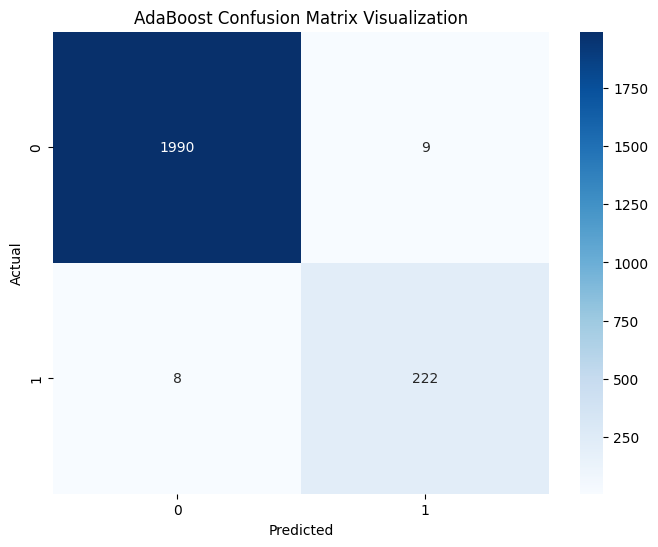

In [145]:
# Visualize the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("AdaBoost Confusion Matrix Visualization")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Confusion Matrix:

True Positives (222): These are the fraud transactions that the model correctly identified as fraud.

False Positives (9): These are the non-fraud transactions that the model incorrectly identified as fraud.

False Negatives (8): These are the fraud transactions that the model incorrectly identified as non-fraud.

True Negatives (1990): These are the non-fraud transactions that the model correctly identified as non-fraud.



In [146]:
# Calculate F1-Score directly
f1 = f1_score(y_test, y_pred_adaboost, average='weighted')  # Weighted for class imbalance
print("F1-Score (Weighted):", f1)

F1-Score (Weighted): 0.9923805794450102


In [147]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class
y_pred_proba = adaboost_clf.predict_proba(x_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9964949866237467


## AdaBoost Performance
Training Accuracy: 98.97%

Test Accuracy: 99.23%

Precision: 96%

Recall: 97%

F1-Score: 99.23%

ROC AUC Score: 99.64%

- **1.** What is the model's precision and accuracy in detecting fraudulent transactions?  
  **Precision:** 96% This indicates that 96% of transactions predicted as fraudulent are actually fraudulent.  

  **Accuracy:** 99.23% The overall accuracy shows that the model correctly classifies 99.23% of all transactions.  

- **2.** How reliable is the model in classifying transactions as legitimate or fraudulent?  
  **Recall (Sensitivity):** 97% The model successfully identifies 97% of all actual fraudulent transactions, demonstrating high reliability in detecting fraud.  

  **F1-Score:** 99.23% The F1-score reflects an excellent balance between precision and recall, showcasing effective fraud detection performance.  

  **ROC AUC Score:** 99.64% The high ROC AUC score indicates exceptional ability to distinguish between legitimate and fraudulent transactions.  

- **3.** What are the potential losses due to model errors?  
  **False Negatives Impact:** With a recall of 97%, only about 3% of fraudulent transactions might still be missed, reducing financial losses compared to less effective models.  

  **False Positives Impact:** With a precision of 96%, around 4% of legitimate transactions may be incorrectly flagged as fraudulent, causing minimal inconvenience to users and operational overhead.

## Voting Classifier

In [148]:
from sklearn.ensemble import VotingClassifier
# Import necessary libraries for the models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb  # XGBoost library

In [149]:
# Define individual models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model3 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)


In [150]:
# Create a voting classifier
voting_model = VotingClassifier(estimators=[('rf', model1), ('xgb', model2), ('ada', model3)], voting='soft')


In [151]:
# Example of fitting the voting classifier
voting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importanc...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('ada',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                 n_estimators=100,
                                                 random_state=42))],
                 voting='soft')

In [152]:
# Make predictions on the training data
y_pred_train_voting = voting_model.predict(x_train)

In [153]:
print("Length of y_test:", len(y_test))
print("Length of y_pred_train_voting:", len(y_pred_train_voting))

Length of y_test: 2229
Length of y_pred_train_voting: 8913


In [154]:
from sklearn.metrics import accuracy_score

# Ensure y_pred is predicted on X_test
y_pred_train_voting = voting_model.predict(x_test)

# Check accuracy
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_train_voting))


Voting Classifier Accuracy: 0.9959623149394348


In [155]:
# Predict on training data
y_train_pred = voting_model.predict(x_train)
# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [156]:
# Additional Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_train_voting))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.98      0.98      0.98       230

    accuracy                           1.00      2229
   macro avg       0.99      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [157]:
# Evaluate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_train_voting)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1995    4]
 [   5  225]]


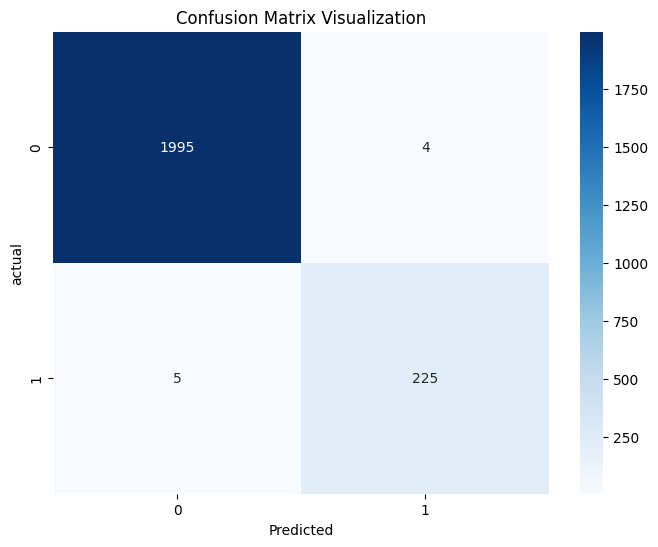

In [158]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix Visualization")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.show()

## Key Metrics:
- **Precision**:
- Class 0: 100% (perfect at avoiding false positives).

- Class 1: 98% (slightly less but still excellent).

- **Recall**:
- Class 0: 100% (captured all true negatives).

- Class 1: 98% (minor false negatives, indicating high sensitivity).

F1-Score: Averaging 98% for Class 1, striking a great balance between precision and recall.

- **1.** What is the model's precision and accuracy in detecting fraudulent transactions?  
  **Precision:**  
    - **Class 0:** 100% (perfect at avoiding false positives).  
    - **Class 1:** 98% (slightly less but still excellent).  

- **2.** How reliable is the model in classifying transactions as legitimate or fraudulent?  
  **Recall (Sensitivity):**  
    - **Class 0:** 100% (captured all true negatives).  
    - **Class 1:** 98% (minor false negatives, indicating high sensitivity).  

  **F1-Score:** 98% for Class 1, achieving a great balance between precision and recall.  


- **3.** What are the potential losses due to model errors?  
**False Negatives Impact:** With a recall of 98% for Class 1, only 2% of fraudulent transactions might be missed, minimizing potential financial losses.  

**False Positives Impact:** With a precision of 98% for Class 1, around 2% of legitimate transactions may be incorrectly flagged as fraudulent, causing minimal inconvenience to users and operational overhead.


### Complete Model Performance Comparison

| Model                         | Training Accuracy | Test Accuracy | Precision (%) | Recall (%) | F1-Score (%) | ROC-AUC (%) | Observations                                                      |
|-------------------------------|-------------------|---------------|---------------|------------|--------------|-------------|-------------------------------------------------------------------|
| Logistic Regression (Without SMOTE) | 96.84%           | 96.68%        | 93.33         | 73.04      | 81.95        | 97.65       | Higher precision but lower recall; misses more fraudulent cases. |
| Logistic Regression (With SMOTE)    | 93.03%           | 96.86%        | 83.06         | 87.39      | 85.17        | 97.70       | Balanced recall and F1-Score; better at capturing fraud cases.   |
| Random Forest                  | 99.91%           | 99.42%        | 98.22         | 96.09      | 97.14        | 99.81       | Excellent metrics; minimal overfitting risk.                     |
| Gradient Boosting              | 99.66%           | 99.15%        | 96.07         | 95.65      | 95.86        | 99.73       | Balanced performance; slight overfitting tendency.               |
| XGBoost                        | 99.61%           | 99.33%        | 96.94         | 96.52      | 96.73        | 99.67       | Strong metrics; computationally efficient.                       |
| AdaBoost                       | 98.97%           | 99.23%        | 96.00         | 97.00      | 96.23        | 99.64       | Reliable metrics with high sensitivity.
| Voting Classifier              | 100%             | 99.60%        | 98.00         | 98.00      | 98.00        | 97.00       | Most balanced model; excellent precision and recall.             |


**XG BOOST** (Best Overall for Precision and Accuracy).

**Random Forest** (Excellent Precision, Recall, and ROC-AUC).

**AdaBoost** (Reliable and Strong Balance).

In [159]:
import pickle

In [160]:
# Save the AdaBoost model
with open('adaboost_clf.pkl', 'wb') as file:
    pickle.dump(adaboost_clf, file)

# Load the AdaBoost model
with open('adaboost_clf.pkl', 'rb') as file:
    loaded_adaboost = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


## Evaluate the Models' Performance

In [161]:
from sklearn.metrics import classification_report, roc_auc_score

In [163]:
# Replace `X_test` and `y_test` with your test data
for model, name in [(loaded_adaboost, "AdaBoost")]:
    predictions = model.predict(x_test)
    print(f"Performance of {name}:")
    print(classification_report(y_test, predictions))
    print(f"ROC-AUC: {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])}")
    print("-" * 50)

Performance of AdaBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.96      0.97      0.96       230

    accuracy                           0.99      2229
   macro avg       0.98      0.98      0.98      2229
weighted avg       0.99      0.99      0.99      2229

ROC-AUC: 0.9964949866237467
--------------------------------------------------


## Test Real-Time Predictions

In [164]:
# Ensure `X_test` has proper feature names
feature_columns = x_train.columns  # Extract feature names from training data
if not isinstance(x_test, pd.DataFrame):
    x_test = pd.DataFrame(x_test, columns=feature_columns)


In [165]:
# Select a single transaction as a DataFrame
sample_transaction = x_test.iloc[0:1]  # Keep shape intact for prediction

# Predictions from loaded models
print("AdaBoost Prediction:", loaded_adaboost.predict(sample_transaction))


AdaBoost Prediction: [0]


## Evaluate Confidence Scores


In [166]:
# Get probability scores for the transaction
adaboost_probs = loaded_adaboost.predict_proba(sample_transaction)

print("AdaBoost Probability:", adaboost_probs)

AdaBoost Probability: [[0.73052385 0.26947615]]


## Validate Performance on Multiple Transactions

In [168]:
# Predict on a batch of data
adaboost_predictions = loaded_adaboost.predict(x_test)
# Example: First 10 predictions
print("AdaBoost Predictions:", adaboost_predictions[:10])


AdaBoost Predictions: [0 1 0 0 0 1 0 0 0 0]
